# **DATA USED FOR THIS PROJECT** [Link](https://datasetsearch.research.google.com/search?query=real%20estate%27%20-site%3Akaggle.com&docid=L2cvMTF2MGI4NjlmOA%3D%3D)

In [ ]:
import pandas as pd

# **Read the dataset from the CSV file**

In [ ]:
df = pd.read_csv('./Real_Estate_Sales_2001-2020_GL.csv', dtype={'col8': float, 'col9': float, 'col10': float, 'col11': float, 'col12': float})


# **Drop columns not needed for analysis**

In [ ]:
columns_to_drop = ['Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location']

df.drop(columns=columns_to_drop, axis=1, inplace=True)
df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family


# **check missing Values**

In [ ]:
df[df.columns].isna().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
dtype: int64

# **Fill missing values in 'Property Type' and 'Residential Type' with the mode**

In [ ]:
df['Property Type'].fillna(df['Property Type'].mode()[0], inplace=True)
df['Residential Type'].fillna(df['Residential Type'].mode()[0], inplace=True)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Single Family
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family


# **fill missing dates based on 'List Year' median, and  addresses with 'Unknown'**

In [ ]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')
df['Date Recorded'] = df.groupby('List Year')['Date Recorded'].transform(lambda x: x.fillna(x.median()))

df['Address'].fillna('Unknown', inplace=True)


In [ ]:
df[df.columns].isna().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64

# **Count the number of zero values in numeric columns**

In [ ]:
numeric_columns = ['Assessed Value', 'Sale Amount', 'Sales Ratio']
(df[numeric_columns] == 0).sum()

Assessed Value    6933
Sale Amount       1810
Sales Ratio       8459
dtype: int64

# **Handling zeros in numerical data**

In [ ]:
df['Sale Amount'] = pd.to_numeric(df['Sale Amount'], errors='coerce')
df['Assessed Value'] = pd.to_numeric(df['Assessed Value'], errors='coerce')

df['Sales Ratio'] = df['Sales Ratio'].mask(df['Sales Ratio'] == 0, df['Sale Amount'] / df['Assessed Value'])


In [ ]:
numeric_columns = ['Assessed Value', 'Sale Amount', 'Sales Ratio']
(df[numeric_columns] == 0).sum()

Assessed Value    6933
Sale Amount       1810
Sales Ratio       1523
dtype: int64

In [ ]:
df['Assessed Value'] = df['Assessed Value'].mask(
    (df['Assessed Value'] == 0) , df.groupby(['Property Type', 'Town'])['Assessed Value'].transform('mean')
)
df['Sale Amount'] = df['Sale Amount'].mask(
    (df['Sale Amount'] == 0), df.groupby(['Property Type', 'Town'])['Sale Amount'].transform('mean')
)
(df[numeric_columns] == 0).sum()

Assessed Value       0
Sale Amount          0
Sales Ratio       1523
dtype: int64

In [ ]:
df['Sales Ratio'] = df['Sales Ratio'].mask(df['Sales Ratio'] == 0, df['Sale Amount'] / df['Assessed Value'])
(df[numeric_columns] == 0).sum()

Assessed Value    0
Sale Amount       0
Sales Ratio       0
dtype: int64

#**Save the cleaned DataFrame to a new CSV file**

In [ ]:
df.to_csv('./cleanData.csv', index=False)
df.head(5)


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Single Family
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family


# **visualizing the DATA**

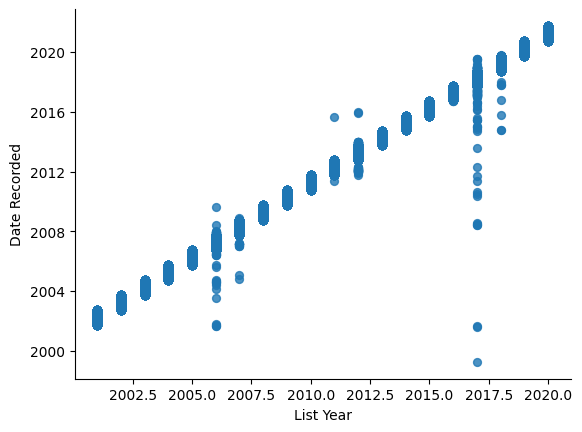

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='List Year', y='Date Recorded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)